In [1]:
#LIBS to be used 

from MDPlus.core import Fasu, Cofasu
from MDPlus.analysis import pca
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

#getting details automatically from files
import glob
import csv
import pandas as pd
import time
import datetime

#saving data 
import pickle

import mdtraj as md

from MDPlus import fastfitting

In [5]:
def save_object(obj, filename, atm, folder):
    with open(atm+folder+filename, 'wb') as output:
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
        
def load_object(filename, atm, folder):
    with open(atm+folder+filename, 'rb') as datainput:
        k = pickle.load(datainput)
        #pickle.load(obj, datainput, pickle.HIGHEST_PROTOCOL)
        print filename, " is now loaded"
        #print obj.shape
        return k;
    
def plot_cofasu_tot(p,cByIters,iters,prj,fileprefix,fileExt,dermsd_index_list, cap, rmsd_index_list=0, offset=0):
    title=prj+" all                "+fileprefix+"*"+fileExt
    pByIters = []
    for i in range(iters-1,iters):
        #print "i is =",i
        p14i4 = []
        p14i4T = []
        for j in range(len(cByIters[i])):
            #print "j is =", j
            p14i4.append(p.map(cByIters[i][j])[[0,3]])
        p14i4T = np.array(p14i4).T
        pByIters.append(p14i4T) 
    fig = plt.figure(figsize=(9,4))
    plt.xlim((-15, 20))
    plt.ylim((-11, 15))
    plt.title(title)
    fig.text(-0.1,-0.2,cap)
    plt.plot(p.projs[0],p.projs[3], 'k.')
    for i in range(len(pByIters)):
        #print i
        plt.plot(pByIters[i][0] , pByIters[i][1] , 'b.')
        
    # plot the 5 most visited/ stable states DE Shaw found from their sim
    plt.plot(p.projs[0][11155],p.projs[3][11155], 'r^') # starting structure
    plt.plot(p.projs[0][dermsd_index_list[:]],p.projs[3][dermsd_index_list[:]], 'ro')
    
    if rmsd_index_list!=0:
        #plot the 5 traj states that are closest to DE Shaw 5 most visted states
        plt.plot(pByIters[0][0][rmsd_index_list[:]],pByIters[0][1][rmsd_index_list[:]], 'wo')

    return pByIters;


def plot_cofasu_tot2(p,pByIters,iters,prj,fileprefix,fileExt,dermsd_index_list, cap, rmsd_index_list=0, offset=0):
    title=prj+" all                "+fileprefix+"*"+fileExt

    fig = plt.figure(figsize=(9,4))
    plt.xlim((-15, 20))
    plt.ylim((-11, 15))
    plt.title(title)
    fig.text(-0.1,-0.2,cap)
    plt.plot(p.projs[0],p.projs[3], 'k.')
    for i in range(len(pByIters)):
        #print i
        plt.plot(pByIters[i][0] , pByIters[i][1] , 'b.')
        
    # plot the 5 most visited/ stable states DE Shaw found from their sim
    plt.plot(p.projs[0][11155],p.projs[3][11155], 'r^') # starting structure
    plt.plot(p.projs[0][dermsd_index_list[:]],p.projs[3][dermsd_index_list[:]], 'ro')
    
    if rmsd_index_list!=0:
        #plot the 5 traj states that are closest to DE Shaw 5 most visted states
        plt.plot(pByIters[0][0][rmsd_index_list[:]],pByIters[0][1][rmsd_index_list[:]], 'wo')

    return ;

In [6]:
# load results for use in other places later on 
filename = 'dermsd_index_list.pkl'
dermsd_index_list = load_object(filename,'../bpti/extasy-bpti/Shaw_Data_Analysis/','')

filename = 'dermsd_values_list.pkl'
dermsd_values_list = load_object(filename,'../bpti/extasy-bpti/Shaw_Data_Analysis/','')

filename = 'dermsd_data_list.pkl'
dermsd_data_list = load_object(filename,'../bpti/extasy-bpti/Shaw_Data_Analysis/','') 

dermsd_index_list.pkl  is now loaded
dermsd_values_list.pkl  is now loaded
dermsd_data_list.pkl  is now loaded


(103125, 58, 3)


/home/feb23/.local/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/home/feb23/.local/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log


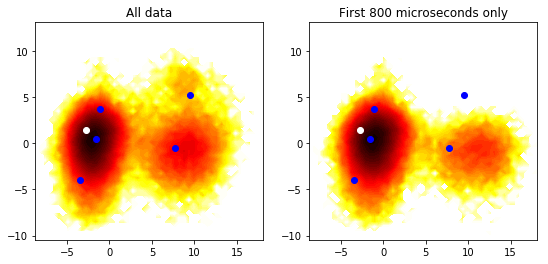

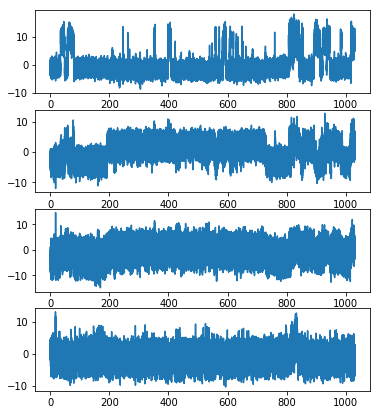

In [7]:
# DE SHAW DATA

f = Fasu('../bpti/extasy-bpti/Shaw_Data_Analysis/bpti_ca_1ms_dt10ns.xtc',
         top='../bpti/extasy-bpti/Shaw_Data_Analysis/bpti_ca.pdb')#,selection='name CA') #note that analysis fails when use selection='name CA'
c = Cofasu(f)

print c.shape # This should give 103125 snapshots, each of 58 atoms, each with three (x,y,z) coordinates
p = pca.fromtrajectory(c)

DE_plot = 1

if DE_plot == 1:
# The rare event can be seen at about 820 microseconds in PC4. A 2-D plot in the PC1/PC4 space works well, 
# see the spot at (-10, 7):
    plt.figure(figsize=(9, 4))
    plt.subplot(1,2,1)
    z,x,y = np.histogram2d(1.0*p.projs[0],p.projs[3], bins=50)
    DEshaw = [x,y,z]
    F = -np.log(z)
    extent = [x[0], x[-1], y[0], y[-1]]
    plt.title('All data')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)

    # plot the 5 most visited/ stable states DE Shaw found from their sim
    plt.plot(p.projs[0][11155],p.projs[3][11155], 'wo') # starting structure
    plt.plot(p.projs[0][dermsd_index_list[0:]],p.projs[3][dermsd_index_list[0:]], 'bo')
 
    
    plt.subplot(1,2,2)
    z,x,y = np.histogram2d(p.projs[0][:80000],p.projs[3][:80000], bins=50)
    F = -np.log(z)
    plt.title('First 800 microseconds only')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
    # note sure why these plots come out flipped right to left compared to plots prof Laughton supplied 
    
    # plot the 5 most visited/ stable states DE Shaw found from their sim
    plt.plot(p.projs[0][11155],p.projs[3][11155], 'wo') # starting structure
    plt.plot(p.projs[0][dermsd_index_list[:]],p.projs[3][dermsd_index_list[:]], 'bo')

    
    # In this cell we plot the time series for the trajectory projected along each of the 1st four PCs
    plt.figure(figsize=(6, 7))
    time = np.arange(len(c)) / 100.0
    plt.subplot(4,1,1)
    plt.plot(time, p.projs[0])
    plt.subplot(4,1,2)
    plt.plot(time, p.projs[1])
    plt.subplot(4,1,3)
    plt.plot(time, p.projs[2])
    plt.subplot(4,1,4)
    plt.plot(time, p.projs[3])

In [64]:
names = [ 'p07e01_k12_00010_k34_00100_tx2', 'p07e01_k12_00100_k34_00100_tx2'  , 'p07e01_k12_00100_k34_01000_4d',
         'p07e01_k12_00100_k34_01000_itx2', 'p07e01_k12_00100_k34_01000_mdtx2', 'p07e01_k12_01000_k34_01000_tx2' ]

#names = [ 'p07e01_k12_00100_k34_01000_4d']

In [65]:
dic_rmsd_index = {}
dic_rmsd_vals  = {}
dic_c2me_index = {}
dic_c2me_vals  = {}
dic_c          = {}
dic_p          = {}
dic_xtc_p      = {}

 ###################################################
 #       p07e01_k12_00010_k34_00100_tx2     starts here               #
 ##################################################
iters = 20
p07e01_k12_00010_k34_00100_tx2_md.pkl  is now loaded
check for DoRmsd
 
p07e01_k12_00010_k34_00100_tx2_rmsd_index_list.pkl  exists
p07e01_k12_00010_k34_00100_tx2_rmsd_values_list.pkl  exists
p07e01_k12_00010_k34_00100_tx2_rmsd_data_list.pkl  exists
p07e01_k12_00010_k34_00100_tx2_rmsd_index_list.pkl  is now loaded
p07e01_k12_00010_k34_00100_tx2_rmsd_values_list.pkl  is now loaded
p07e01_k12_00010_k34_00100_tx2_rmsd_data_list.pkl  is now loaded
check for c2me_DoRmsd
 
p07e01_k12_00010_k34_00100_tx2_c2me_rmsd_index_list.pkl  exists
p07e01_k12_00010_k34_00100_tx2_c2me_rmsd_values_list.pkl  exists
p07e01_k12_00010_k34_00100_tx2_c2me_rmsd_data_list.pkl  exists
p07e01_k12_00010_k34_00100_tx2_c2me_rmsd_index_list.pkl  is now loaded
p07e01_k12_00010_k34_00100_tx2_c2me_rmsd_values_list.pkl  is now loaded
p07e01

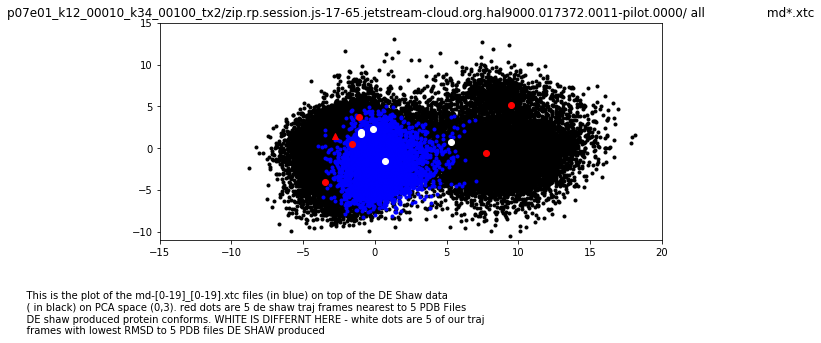

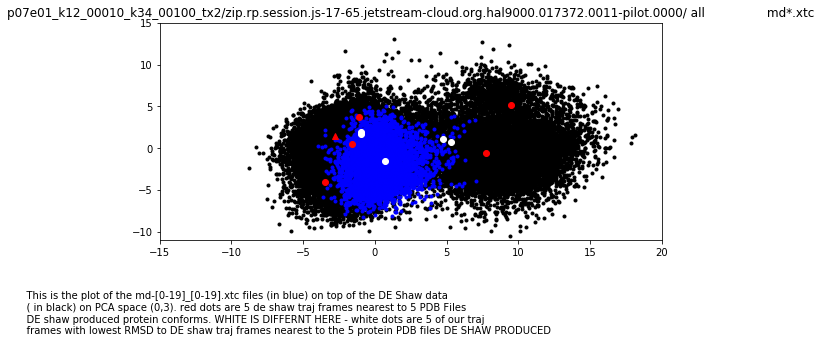

 ###################################################
 #       p07e01_k12_00100_k34_00100_tx2     starts here               #
 ##################################################
iters = 19
iters = 18
p07e01_k12_00100_k34_00100_tx2_md.pkl  is now loaded
check for DoRmsd
 
p07e01_k12_00100_k34_00100_tx2_rmsd_index_list.pkl  exists
p07e01_k12_00100_k34_00100_tx2_rmsd_values_list.pkl  exists
p07e01_k12_00100_k34_00100_tx2_rmsd_data_list.pkl  exists
p07e01_k12_00100_k34_00100_tx2_rmsd_index_list.pkl  is now loaded
p07e01_k12_00100_k34_00100_tx2_rmsd_values_list.pkl  is now loaded
p07e01_k12_00100_k34_00100_tx2_rmsd_data_list.pkl  is now loaded
check for c2me_DoRmsd
 
p07e01_k12_00100_k34_00100_tx2_c2me_rmsd_index_list.pkl  exists
p07e01_k12_00100_k34_00100_tx2_c2me_rmsd_values_list.pkl  exists
p07e01_k12_00100_k34_00100_tx2_c2me_rmsd_data_list.pkl  exists
p07e01_k12_00100_k34_00100_tx2_c2me_rmsd_index_list.pkl  is now loaded
p07e01_k12_00100_k34_00100_tx2_c2me_rmsd_values_list.pkl  is now lo

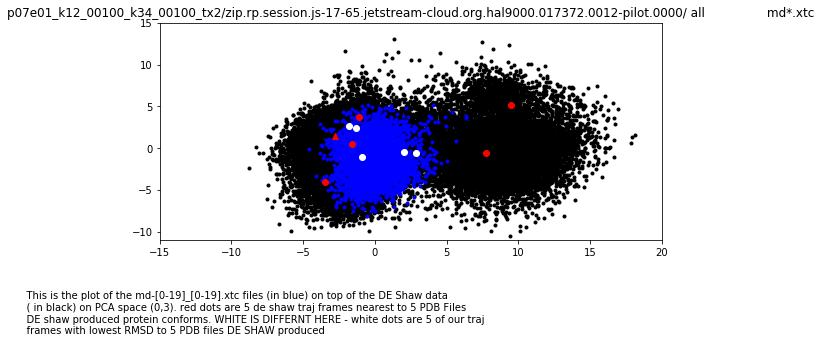

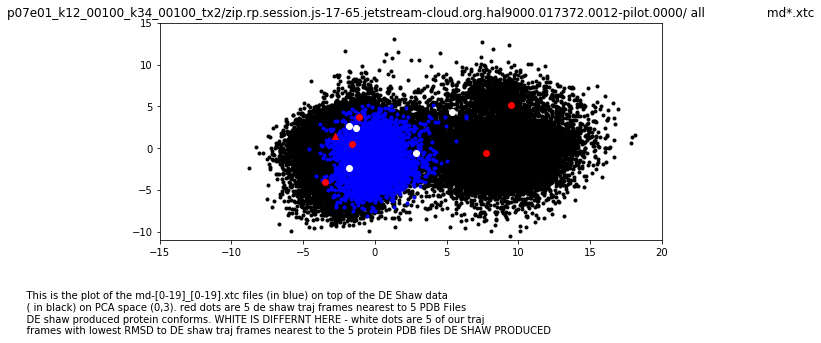

 ###################################################
 #       p07e01_k12_00100_k34_01000_4d     starts here               #
 ##################################################
iters = 20
p07e01_k12_00100_k34_01000_4d_md.pkl  is now loaded
check for DoRmsd
 
p07e01_k12_00100_k34_01000_4d_rmsd_index_list.pkl  exists
p07e01_k12_00100_k34_01000_4d_rmsd_values_list.pkl  exists
p07e01_k12_00100_k34_01000_4d_rmsd_data_list.pkl  exists
p07e01_k12_00100_k34_01000_4d_rmsd_index_list.pkl  is now loaded
p07e01_k12_00100_k34_01000_4d_rmsd_values_list.pkl  is now loaded
p07e01_k12_00100_k34_01000_4d_rmsd_data_list.pkl  is now loaded
check for c2me_DoRmsd
 
p07e01_k12_00100_k34_01000_4d_c2me_rmsd_index_list.pkl  exists
p07e01_k12_00100_k34_01000_4d_c2me_rmsd_values_list.pkl  exists
p07e01_k12_00100_k34_01000_4d_c2me_rmsd_data_list.pkl  exists
p07e01_k12_00100_k34_01000_4d_c2me_rmsd_index_list.pkl  is now loaded
p07e01_k12_00100_k34_01000_4d_c2me_rmsd_values_list.pkl  is now loaded
p07e01_k12_00100_k3

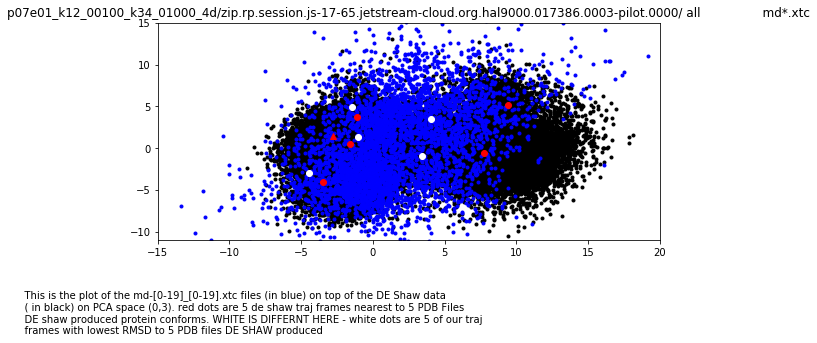

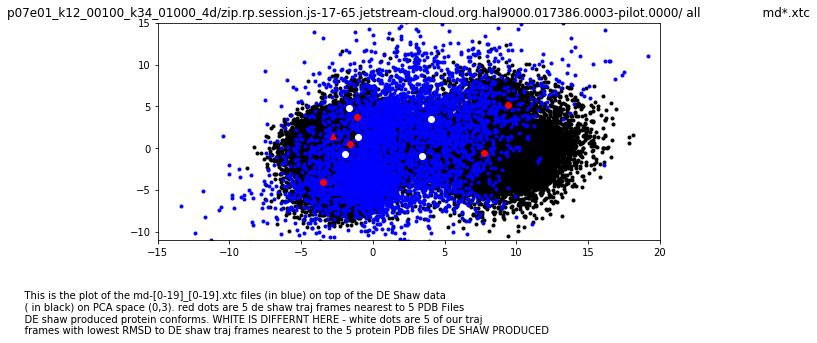

 ###################################################
 #       p07e01_k12_00100_k34_01000_itx2     starts here               #
 ##################################################
iters = 37
p07e01_k12_00100_k34_01000_itx2_md.pkl  is now loaded
check for DoRmsd
 
p07e01_k12_00100_k34_01000_itx2_rmsd_index_list.pkl  exists
p07e01_k12_00100_k34_01000_itx2_rmsd_values_list.pkl  exists
p07e01_k12_00100_k34_01000_itx2_rmsd_data_list.pkl  exists
p07e01_k12_00100_k34_01000_itx2_rmsd_index_list.pkl  is now loaded
p07e01_k12_00100_k34_01000_itx2_rmsd_values_list.pkl  is now loaded
p07e01_k12_00100_k34_01000_itx2_rmsd_data_list.pkl  is now loaded
check for c2me_DoRmsd
 
p07e01_k12_00100_k34_01000_itx2_c2me_rmsd_index_list.pkl  exists
p07e01_k12_00100_k34_01000_itx2_c2me_rmsd_values_list.pkl  exists
p07e01_k12_00100_k34_01000_itx2_c2me_rmsd_data_list.pkl  exists
p07e01_k12_00100_k34_01000_itx2_c2me_rmsd_index_list.pkl  is now loaded
p07e01_k12_00100_k34_01000_itx2_c2me_rmsd_values_list.pkl  is now 

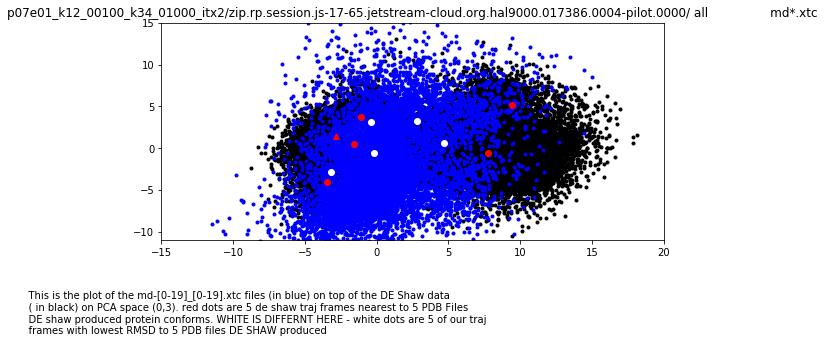

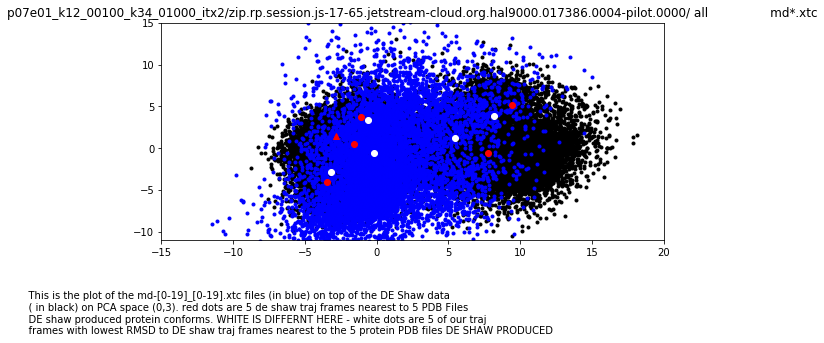

 ###################################################
 #       p07e01_k12_00100_k34_01000_mdtx2     starts here               #
 ##################################################
iters = 20
p07e01_k12_00100_k34_01000_mdtx2_md.pkl  is now loaded
check for DoRmsd
 
p07e01_k12_00100_k34_01000_mdtx2_rmsd_index_list.pkl  exists
p07e01_k12_00100_k34_01000_mdtx2_rmsd_values_list.pkl  exists
p07e01_k12_00100_k34_01000_mdtx2_rmsd_data_list.pkl  exists
p07e01_k12_00100_k34_01000_mdtx2_rmsd_index_list.pkl  is now loaded
p07e01_k12_00100_k34_01000_mdtx2_rmsd_values_list.pkl  is now loaded
p07e01_k12_00100_k34_01000_mdtx2_rmsd_data_list.pkl  is now loaded
check for c2me_DoRmsd
 
p07e01_k12_00100_k34_01000_mdtx2_c2me_rmsd_index_list.pkl  exists
p07e01_k12_00100_k34_01000_mdtx2_c2me_rmsd_values_list.pkl  exists
p07e01_k12_00100_k34_01000_mdtx2_c2me_rmsd_data_list.pkl  exists
p07e01_k12_00100_k34_01000_mdtx2_c2me_rmsd_index_list.pkl  is now loaded
p07e01_k12_00100_k34_01000_mdtx2_c2me_rmsd_values_list

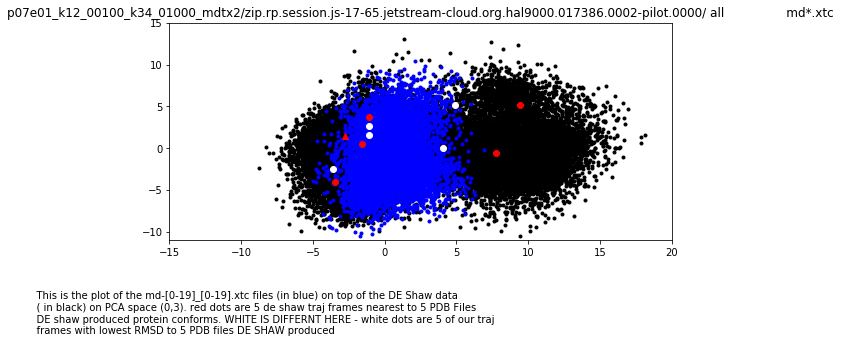

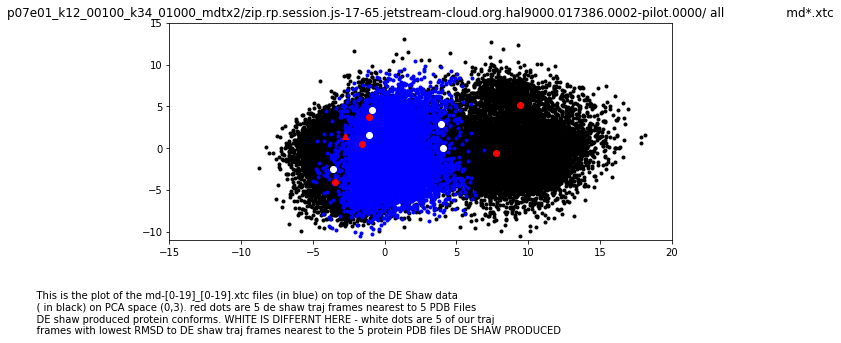

 ###################################################
 #       p07e01_k12_01000_k34_01000_tx2     starts here               #
 ##################################################
iters = 20
p07e01_k12_01000_k34_01000_tx2_md.pkl  is now loaded
check for DoRmsd
 
p07e01_k12_01000_k34_01000_tx2_rmsd_index_list.pkl  exists
p07e01_k12_01000_k34_01000_tx2_rmsd_values_list.pkl  exists
p07e01_k12_01000_k34_01000_tx2_rmsd_data_list.pkl  exists
p07e01_k12_01000_k34_01000_tx2_rmsd_index_list.pkl  is now loaded
p07e01_k12_01000_k34_01000_tx2_rmsd_values_list.pkl  is now loaded
p07e01_k12_01000_k34_01000_tx2_rmsd_data_list.pkl  is now loaded
check for c2me_DoRmsd
 
p07e01_k12_01000_k34_01000_tx2_c2me_rmsd_index_list.pkl  exists
p07e01_k12_01000_k34_01000_tx2_c2me_rmsd_values_list.pkl  exists
p07e01_k12_01000_k34_01000_tx2_c2me_rmsd_data_list.pkl  exists
p07e01_k12_01000_k34_01000_tx2_c2me_rmsd_index_list.pkl  is now loaded
p07e01_k12_01000_k34_01000_tx2_c2me_rmsd_values_list.pkl  is now loaded
p07e01

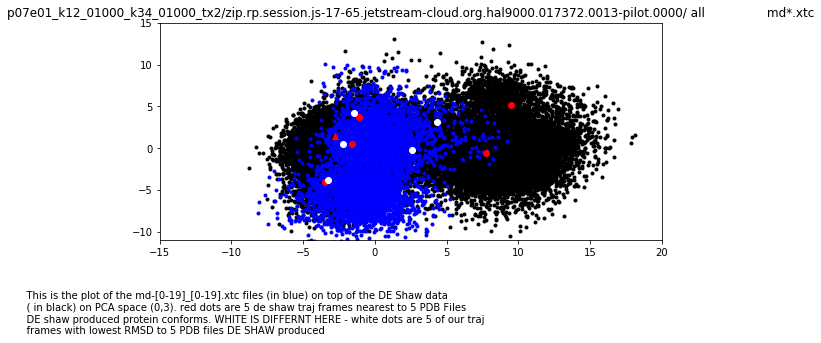

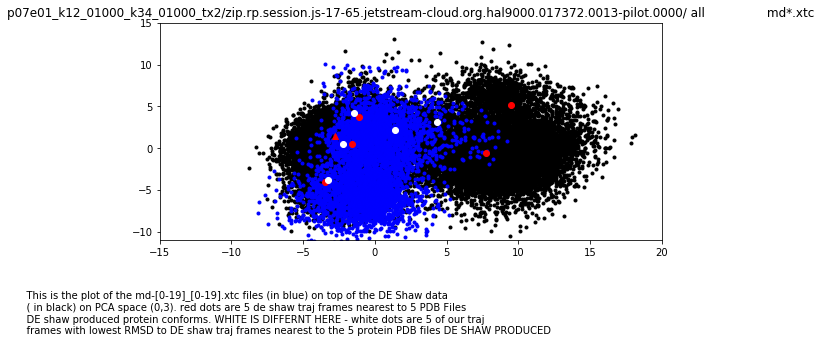

In [67]:

for i in range(len(names)):
    dirname=names[i]
    doCoFasu = 0
    doRmsd=0

    reqe =6
    print " ###################################################"
    print " #      ", names[i], "    starts here               #"
    print " ##################################################"

    # no need to touch
    cu = 20 
    iters = 20
    cores = 200
    top = '../bpti/old_gits/test_git_dev/gmxcoco-bpti/inp_files/bpti.gro'
    atm = '/home/feb23/Documents/jha/extasy/bpti/atmosphere_rsync/'

    folder = dirname+"/"

    path_to_zip = glob.glob(atm+folder+'zip.rp*-pilot.0000')
#print path_to_zip
#print type(path_to_zip)
#print path_to_zip[0].split("/")[-1]
#print path_to_zip[0].split("/")[-1].split("-pilot.0000")

    rpname = str(path_to_zip[0].split("/")[-1].split("-pilot.0000")[0])
    zipfolder = rpname+ '-pilot.0000/'
    prj = folder + zipfolder
    path   = atm+prj
    pathSt = atm+prj+"staging"
    pathCu = atm+prj+"cu009"
#print path


#print " "
#print "path to cu"
    path_to_cu = glob.glob(atm+folder+zipfolder+"/cu009/"+"min-*_9.log")
#print path_to_cu
#print len(path_to_cu)
    
    iters = int(len(path_to_cu))+2
    print 'iters =', iters
    if names[i]=="p07e01_k12_00100_k34_00100_tx2":
        iters = int(len(path_to_cu))+2-1
        print 'iters =', iters
    
    
    
    
    
    
    
    
    
    
    
# Fasu and Cofasu of the md-[0-iters]_[0-cu].xtc files - so can compare data in PCA space vs DE Shaw data
    fileExt = '.xtc'
    fileprefix = 'md'
    #cByIters = [[0 for i in range(cu)] for j in range(iters)]
    filename = dirname+"_"+fileprefix+".pkl"
    cByIters = load_object(filename,atm,folder)
    dic_c[names[i]]= cByIters 

    
    # check if need DoRmsd

    print "check for DoRmsd"
    print " "
    filename = dirname+"_"+'rmsd_index_list.pkl'
    checkForDoRmsd = glob.glob(atm+folder+filename)
    #print checkForCoFasu
    if checkForDoRmsd==[]:
        doRmsd=1
    else:
        print filename, " exists"

    filename = dirname+"_"+'rmsd_values_list.pkl'
    checkForDoRmsd = glob.glob(atm+folder+filename)
    #print checkForCoFasu
    if checkForDoRmsd==[]:
        doRmsd=1
    else:
        print filename, " exists" 
    
    filename = dirname+"_"+'rmsd_data_list.pkl'
    checkForDoRmsd = glob.glob(atm+folder+filename)
    #print checkForCoFasu
    if checkForDoRmsd==[]:
        doRmsd=1
    else:
        print filename, " exists"
        
        
            # load results for use in other places later on 
    filename = dirname+"_"+'rmsd_index_list.pkl'
    rmsd_index_list = load_object(filename,atm,folder)

    filename = dirname+"_"+'rmsd_values_list.pkl'
    rmsd_values_list = load_object(filename,atm,folder)

    filename = dirname+"_"+'rmsd_data_list.pkl'
    rmsd_data_list = load_object(filename,atm,folder) 
    
    dic_rmsd_index[names[i]] =  rmsd_index_list
    dic_rmsd_vals[names[i]]  =  rmsd_values_list

    
    
    
    # check if need c2me_DoRmsd
    c2me_doRmsd=0

    print "check for c2me_DoRmsd"
    print " "
    filename = dirname+"_"+'c2me_rmsd_index_list.pkl'
    checkForDoRmsd = glob.glob(atm+folder+filename)
    #print checkForCoFasu
    if checkForDoRmsd==[]:
        c2me_doRmsd=1
    else:
        print filename, " exists"

    filename = dirname+"_"+'c2me_rmsd_values_list.pkl'
    checkForDoRmsd = glob.glob(atm+folder+filename)
    #print checkForCoFasu
    if checkForDoRmsd==[]:
        c2me_doRmsd=1
    else:
        print filename, " exists" 
    
    filename = dirname+"_"+'c2me_rmsd_data_list.pkl'
    checkForDoRmsd = glob.glob(atm+folder+filename)
    #print checkForCoFasu
    if checkForDoRmsd==[]:
        c2me_doRmsd=1
    else:
        print filename, " exists" 
        
        
    # load results for use in other places later on 
    filename = dirname+"_"+'c2me_rmsd_index_list.pkl'
    c2me_rmsd_index_list = load_object(filename,atm,folder)

    filename = dirname+"_"+'c2me_rmsd_values_list.pkl'
    c2me_rmsd_values_list = load_object(filename,atm,folder)

    filename = dirname+"_"+'c2me_rmsd_data_list.pkl'
    c2me_rmsd_data_list = load_object(filename,atm,folder) 
    
    
    dic_c2me_index[names[i]] = c2me_rmsd_index_list
    dic_c2me_vals[names[i]]  = c2me_rmsd_values_list
    
    
    print " c by iters test "
    
    #iters = 0
    #for j in range(len(cByIters)):
    #    if str(type(cByIters[j]))=="<class 'MDPlus.core.Cofasu'>":
    #        print "bingo!"
    #    else:
    #        iters =  iters+1
    #print "iters = ", iters
    
    
    
    #PLOTTING DATA IN PCA SPACE

    #print cByIters[iters-1].shape
    fileExt = '.xtc'
    fileprefix = 'md'
    cap ='''
    This is the plot of the md-[0-19]_[0-19].xtc files (in blue) on top of the DE Shaw data
    ( in black) on PCA space (0,3). red dots are 5 de shaw traj frames nearest to 5 PDB Files 
    DE shaw produced protein conforms. WHITE IS DIFFERNT HERE - white dots are 5 of our traj 
    frames with lowest RMSD to 5 PDB files DE SHAW produced'''

    pByIters = plot_cofasu_tot(p,cByIters,iters,prj,fileprefix,fileExt,dermsd_index_list, cap, rmsd_index_list)
    
    plt.show()
    
    cap ='''
    This is the plot of the md-[0-19]_[0-19].xtc files (in blue) on top of the DE Shaw data
    ( in black) on PCA space (0,3). red dots are 5 de shaw traj frames nearest to 5 PDB Files 
    DE shaw produced protein conforms. WHITE IS DIFFERNT HERE - white dots are 5 of our traj 
    frames with lowest RMSD to DE shaw traj frames nearest to the 5 protein PDB files DE SHAW PRODUCED'''
    
    plot_cofasu_tot2(p,pByIters,iters,prj,fileprefix,fileExt,dermsd_index_list, cap, c2me_rmsd_index_list)
    plt.show()
    # our data 
    xtc_p = pca.fromtrajectory(cByIters[iters-1],req_evecs=reqe)
    dic_xtc_p[names[i]]=xtc_p
    
    

In [70]:
class prettyfloat(float):
    def __repr__(self):
        return "%.3f" % self


print "RMSD of DE SHAW traj w/ PDB files from DE SHAW"
print map(prettyfloat,dermsd_values_list)

for i in range(len(names)):
    print " "
    print names[i]
    print "RMSD w/ PDB files form DE SHAW"
    print map(prettyfloat,dic_rmsd_vals[names[i]])
    print " "
    print "RMSD w/ DE shaw traj files that are closest to PDB FILES"
    print map(prettyfloat,dic_c2me_vals[names[i]])

RMSD of DE SHAW traj w/ PDB files from DE SHAW
[0.641, 0.563, 0.883, 0.498, 0.004]
 
p07e01_k12_00010_k34_00100_tx2
RMSD w/ PDB files form DE SHAW
[0.877, 1.572, 2.146, 1.354, 0.868]
 
RMSD w/ DE shaw traj files that are closest to PDB FILES
[0.803, 1.435, 2.138, 1.309, 0.868]
 
p07e01_k12_00100_k34_00100_tx2
RMSD w/ PDB files form DE SHAW
[0.803, 1.597, 2.216, 1.499, 0.864]
 
RMSD w/ DE shaw traj files that are closest to PDB FILES
[0.766, 1.526, 2.157, 1.434, 0.864]
 
p07e01_k12_00100_k34_01000_4d
RMSD w/ PDB files form DE SHAW
[0.735, 1.580, 2.191, 1.209, 0.877]
 
RMSD w/ DE shaw traj files that are closest to PDB FILES
[0.666, 1.414, 2.082, 1.185, 0.878]
 
p07e01_k12_00100_k34_01000_itx2
RMSD w/ PDB files form DE SHAW
[0.722, 1.535, 2.146, 1.126, 0.828]
 
RMSD w/ DE shaw traj files that are closest to PDB FILES
[0.694, 1.397, 2.027, 1.083, 0.828]
 
p07e01_k12_00100_k34_01000_mdtx2
RMSD w/ PDB files form DE SHAW
[0.827, 1.519, 2.173, 1.180, 0.836]
 
RMSD w/ DE shaw traj files that a

<class 'MDPlus.core.Cofasu'>
